<a href="https://colab.research.google.com/github/vatj/boat-count/blob/main/boat_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf

In [2]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [67]:
class BoatCounter:
  
  def __init__(self):
    self.video_path = "/content/Test-Task Sequence from Wörthersee.mp4"
    self.module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
    self.confidence_threshold = 0.75
    self.mean_iou_threshold = 0.6
    self.boat_count = 0
    self.load_video()
    self.load_model()

  def load_model(self):
    # self.detector = hub.load(self.module_handle).signatures['default']
    self.detector = detector

  def load_video(self):
    self.cap = cv2.VideoCapture(self.video_path)

  def main(self):
    count = 0

    while self.cap.isOpened():
      
      _ , frame = self.cap.read()
      self.current_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      self.run_single_inference()
      self.postprocess_inference()

      if count > 20:
        break
    
      count += 1
    #   self.draw_all_bounding_boxes()
    #   self.run_all_mean_IOU_trackers()
    
    # self.save_box_frames_to_video()

  def run_single_inference(self):
    converted_frame = self.preprocess_frame_for_inference()
    self.current_output = self.detector(converted_frame)
    # raise NotImplementedError()

  def preprocess_frame_for_inference(self):
    return tf.image.convert_image_dtype(tf.convert_to_tensor(self.current_frame), dtype=tf.float32)[tf.newaxis, ...]

  def postprocess_inference(self):
    numpy_outputs = {key: value.numpy() for key, value in self.current_output.items()}
    self.postprocess_outputs = []

    for index, key in enumerate(numpy_outputs["detection_class_entities"]):
      if ((key == b"Boat") and (numpy_outputs["detection_scores"][index] > self.confidence_threshold)):
        self.postprocess_outputs.append(numpy_outputs["detection_boxes"][index])

    print(self.postprocess_outputs)
    # raise NotImplementedError()

  def draw_single_bounding_box(self, bounding_box_coord):
    raise NotImplementedError()

  def draw_all_bounding_boxes(self, bounding_box_coord_list):
    raise NotImplementedError()

  def run_single_mean_IOU_tracker(self, current_object_coord, previous_object_coord_list):
    raise NotImplementedError()

  def run_all_mean_IOU_trackers(self, current_object_coord_list, previous_object_coord_list):
    raise NotImplementedError()

  def save_box_frames_to_video():
    raise NotImplementedError()

In [68]:
my_boat_counter = BoatCounter()

In [69]:
my_boat_counter.main()

[array([0.34947386, 0.02269781, 0.9835453 , 0.73180956], dtype=float32)]
[array([0.31663463, 0.03125563, 0.98659784, 0.7170001 ], dtype=float32)]
[array([0.3353548 , 0.02099389, 0.98877895, 0.70820767], dtype=float32)]
[array([0.34671637, 0.02843094, 0.9928164 , 0.71413976], dtype=float32)]
[array([0.3507062 , 0.02019897, 0.99544525, 0.7151116 ], dtype=float32)]
[array([0.34332934, 0.02510005, 0.99117035, 0.71311355], dtype=float32)]
[array([0.29581895, 0.02446449, 0.9856825 , 0.76732403], dtype=float32)]
[array([0.29537374, 0.01564831, 0.99002963, 0.8042883 ], dtype=float32)]
[array([0.34532085, 0.01378569, 0.99850315, 0.7216834 ], dtype=float32)]
[array([0.30449125, 0.01405537, 0.9992338 , 0.79806393], dtype=float32)]
[array([0.30720827, 0.01708928, 0.9985087 , 0.7914225 ], dtype=float32)]
[array([0.3565561 , 0.01684707, 0.9910272 , 0.7215895 ], dtype=float32)]
[array([0.31488696, 0.02495354, 0.9918249 , 0.7590809 ], dtype=float32)]
[array([0.29436728, 0.0150502 , 0.99273   , 0.78751

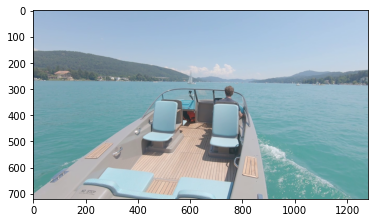

In [70]:
plt.imshow(my_boat_counter.current_frame)

In [71]:
my_boat_counter.current_output

{'detection_boxes': <tf.Tensor: shape=(100, 4), dtype=float32, numpy=
 array([[0.32797837, 0.        , 0.9992824 , 0.749313  ],
        [0.40057066, 0.54754925, 0.6562594 , 0.6410092 ],
        [0.32302776, 0.45816624, 0.3974618 , 0.48144442],
        [0.37447897, 0.48779172, 0.96426994, 0.7109615 ],
        [0.36263487, 0.01524001, 0.97845864, 0.5373563 ],
        [0.38894525, 0.78301007, 0.40599656, 0.7993904 ],
        [0.3693642 , 0.27822128, 0.781609  , 0.688326  ],
        [0.39878306, 0.54552203, 0.6554312 , 0.63786703],
        [0.4986333 , 0.5214879 , 0.81297475, 0.62668365],
        [0.27178448, 0.1917617 , 0.9420521 , 0.7094214 ],
        [0.46143913, 0.53956324, 0.6676468 , 0.6299105 ],
        [0.40922782, 0.5460189 , 0.51214105, 0.6188634 ],
        [0.39775854, 0.5271253 , 0.732777  , 0.62778825],
        [0.45777607, 0.5471655 , 0.6058359 , 0.62422574],
        [0.40142187, 0.49879807, 0.9587593 , 0.7068029 ],
        [0.4587333 , 0.5428567 , 0.50729185, 0.6165824 ],
  

In [72]:
my_boat_counter.postprocess_outputs

[array([0.32797837, 0.        , 0.9992824 , 0.749313  ], dtype=float32)]